In [ ]:
import polars as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
student = pd.read_csv('drive/MyDrive/Colab Notebooks/input/student-mat.csv', separator=";")
student.head()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
str,str,i64,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""","""course""","""mother""",2,2,0,"""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""","""no""",4,3,4,1,1,3,6,5,6,6
"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""","""course""","""father""",1,2,0,"""no""","""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""",5,3,3,1,1,3,4,5,5,6
"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""","""other""","""mother""",1,2,3,"""yes""","""no""","""yes""","""no""","""yes""","""yes""","""yes""","""no""",4,3,2,2,3,3,10,7,8,10
"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""","""home""","""mother""",1,3,0,"""no""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""",3,2,2,1,1,5,2,15,14,15
"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""","""home""","""father""",1,2,0,"""no""","""yes""","""yes""","""no""","""yes""","""yes""","""no""","""no""",4,3,2,1,2,5,4,6,10,10


In [ ]:
print('Total number of students:',len(student))

Total number of students: 395


In [ ]:
student['G3'].describe()

statistic,value
str,f64
"""count""",395.0
"""null_count""",0.0
"""mean""",10.41519
"""std""",4.581443
"""min""",0.0
"""25%""",8.0
"""50%""",11.0
"""75%""",14.0
"""max""",20.0


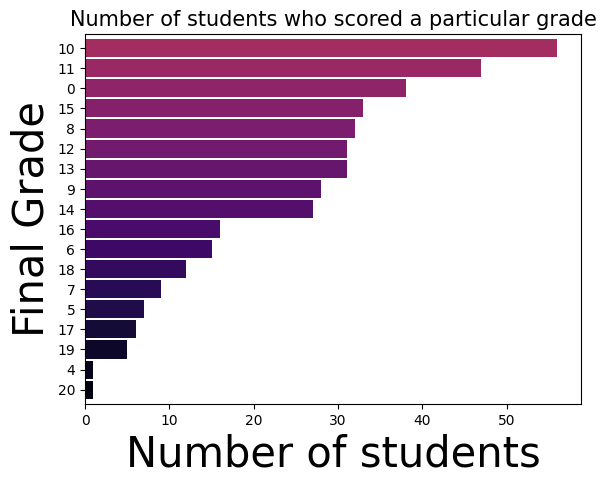

In [ ]:
grade_counts = student['G3'].value_counts().sort('count', descending=False)
# Convert to Pandas DataFrame for easy plotting
grade_counts_df = grade_counts.to_pandas()

# Plotting with Matplotlib and Seaborn
ax = grade_counts_df.plot.barh(x='G3', y='count', width=0.9, color=sns.color_palette('inferno', 40), legend=False)

# Set the title and labels
ax.set_title('Number of students who scored a particular grade', fontsize=15)
ax.set_xlabel('Number of students', fontsize=30)
ax.set_ylabel('Final Grade', fontsize=30)

# Show the plot
plt.show()

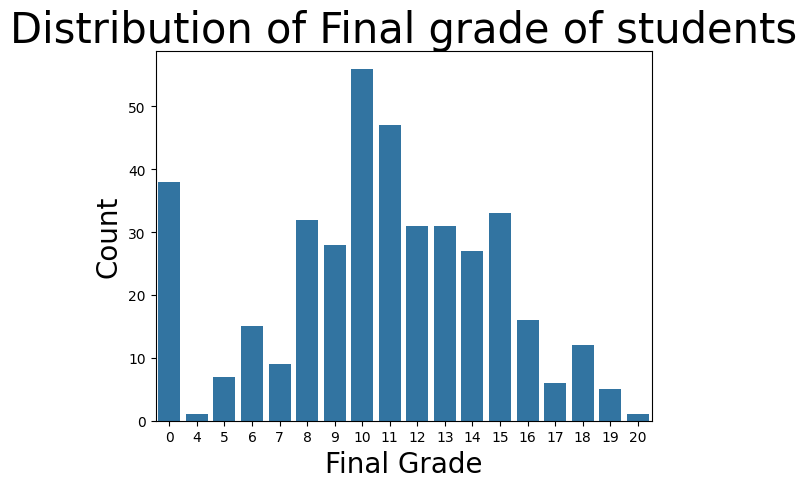

In [ ]:
# Convert 'G3' column to Pandas Series
g3_column = student['G3'].to_pandas()

# Now plot the countplot
b = sns.countplot(x=g3_column)

#b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()



Qualcosa non va. Cosi tanti 0??

In [ ]:
student.null_count()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ok, nessun null che viene convertito automaticamente a 0

Passiamo ad analizzare altri fattori

In [ ]:
male_studs = len(student.filter(pd.col('sex') == 'M'))
female_studs = len(student.filter(pd.col('sex') == 'F'))
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


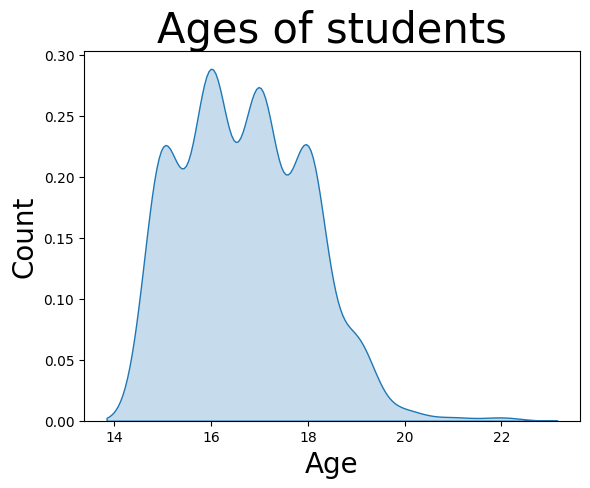

In [ ]:
b = sns.kdeplot(student['age'], fill=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()



Carino, ma vogliamo un grafico che ci permetta di avere piu conoscenza sui dati. Ad esempio ci piacerebbe controllare se esistono differenze sostanziali di eta' per gender

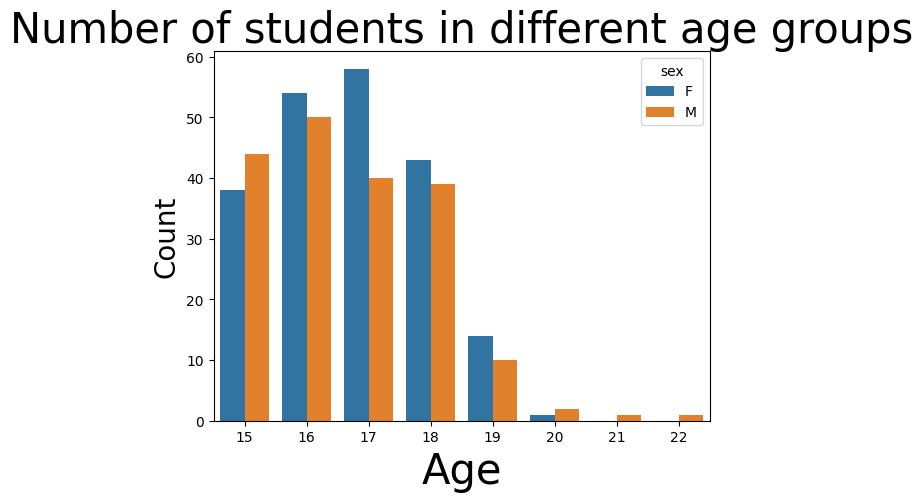

In [ ]:
b = sns.countplot(x='age',hue='sex', data=student)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

Eta' spaziano dai 15 ai 19 anni. Gli studenti al di sopra di quella eta' potrebbero essere studenti bocciati (e non errori nei dati). Non sembrano esserci grosse differenze tra gender.

**L'eta' in qualche modo influenza il voto finale?**

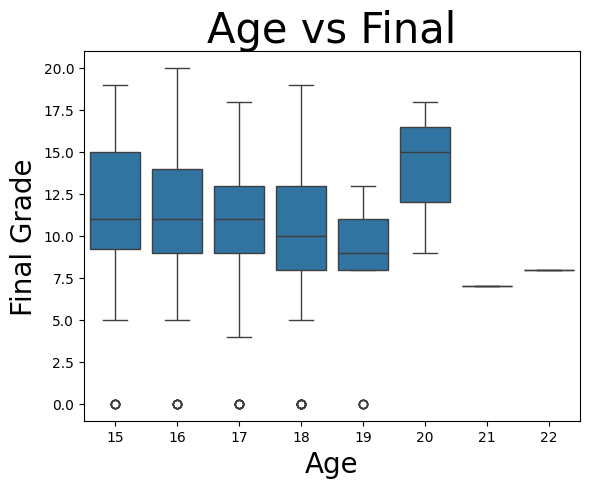

In [ ]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Oh! Come mai piu vecchio sei e migliori sono i voti?

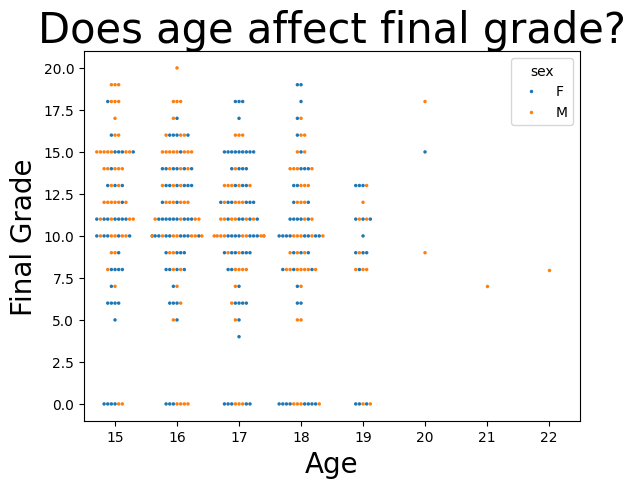

In [ ]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student, size=2.5)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Svelato il mistero, avevamo dei dati "sporadici" che falsavano la nostra percezione. Abbiamo troppi pochi dati sugli studenti 19+ per poter trovare correlazioni valide.

**Citta' vs Campagna. Chi avra' voti migliori?**

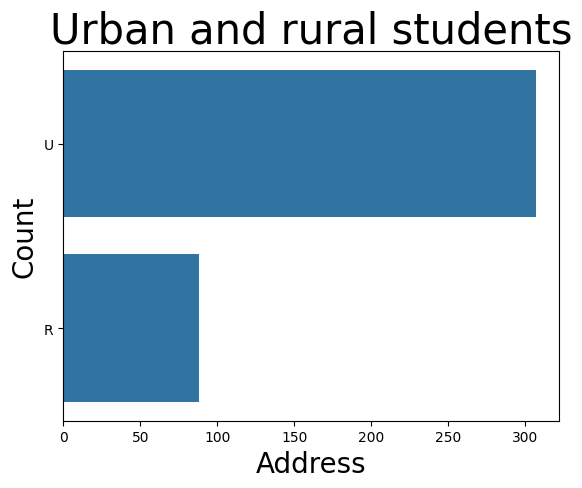

In [ ]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

La maggior parte degli studenti proviene dalle citta'. Ma hanno risultati migliori?

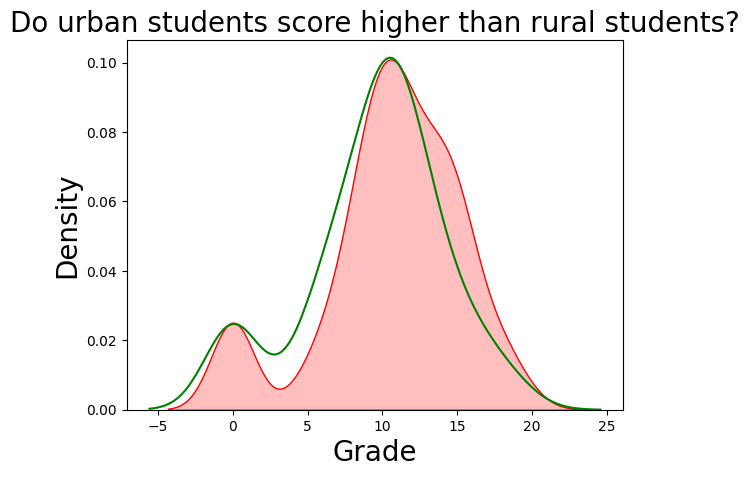

In [ ]:
# Grade distribution by address
urban_data = student.filter(pd.col('address') == 'U').select(['G3', 'address']).rename({"G3": "Final Grade"})
rural_data = student.filter(pd.col('address') == 'R').select(['G3', 'address']).rename({"G3": "Final Grade"})
sns.kdeplot(urban_data, x="Final Grade", fill = True, color='red')
sns.kdeplot(rural_data, x="Final Grade", fill = False, color='green')
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

Non troviamo grandi problemi nei dati. Tempo di iniziare a preparare i dati per l'addestramento.

In [ ]:
from polars import DataFrame
import pandas
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
students_w_dropped_col = student.drop(['school', 'G1', 'G2'])

# One-Hot Encoding of Categorical Variables

oh_encod_students = pd.from_pandas(pandas.get_dummies(students_w_dropped_col.to_pandas()))
print(oh_encod_students.head())



shape: (5, 55)
┌─────┬──────┬──────┬────────────┬───┬─────────────┬──────────────┬─────────────┬──────────────┐
│ age ┆ Medu ┆ Fedu ┆ traveltime ┆ … ┆ internet_no ┆ internet_yes ┆ romantic_no ┆ romantic_yes │
│ --- ┆ ---  ┆ ---  ┆ ---        ┆   ┆ ---         ┆ ---          ┆ ---         ┆ ---          │
│ i64 ┆ i64  ┆ i64  ┆ i64        ┆   ┆ bool        ┆ bool         ┆ bool        ┆ bool         │
╞═════╪══════╪══════╪════════════╪═══╪═════════════╪══════════════╪═════════════╪══════════════╡
│ 18  ┆ 4    ┆ 4    ┆ 2          ┆ … ┆ true        ┆ false        ┆ true        ┆ false        │
│ 17  ┆ 1    ┆ 1    ┆ 1          ┆ … ┆ false       ┆ true         ┆ true        ┆ false        │
│ 15  ┆ 1    ┆ 1    ┆ 1          ┆ … ┆ false       ┆ true         ┆ true        ┆ false        │
│ 15  ┆ 4    ┆ 2    ┆ 1          ┆ … ┆ false       ┆ true         ┆ false       ┆ true         │
│ 16  ┆ 3    ┆ 3    ┆ 1          ┆ … ┆ true        ┆ false        ┆ true        ┆ false        │
└─────┴──────┴─

In [ ]:
# Find correlations with the Grade
most_correlated = oh_encod_students.to_pandas().corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated






,G3
G3,1.000000
failures,0.360415
Medu,0.217147
higher_yes,0.182465
higher_no,0.182465
age,0.161579
Fedu,0.152457
goout,0.132791
romantic_no,0.129970


In [ ]:
student_corr_table = oh_encod_students.select(most_correlated.index)
student_corr_table.head()



G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
i64,i64,i64,bool,bool,i64,i64,i64,bool
6,0,4,true,false,18,4,4,true
6,0,1,true,false,17,1,3,true
10,3,1,true,false,15,1,2,true
15,0,4,true,false,15,2,2,false
10,0,3,true,false,16,3,2,true


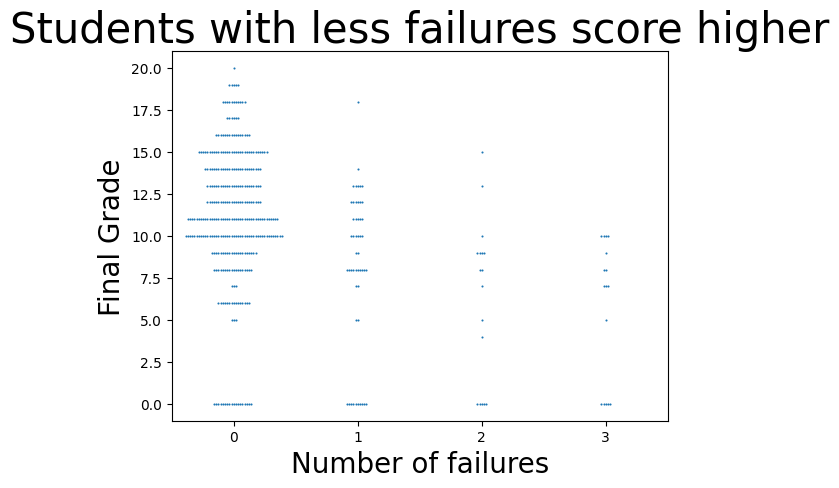

In [ ]:
b = sns.swarmplot(x=student_corr_table['failures'],y=student_corr_table['G3'], size=1.5)
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Interessante, studenti che non hanno fallito il test in precedenza tendono ad avere voti migliori

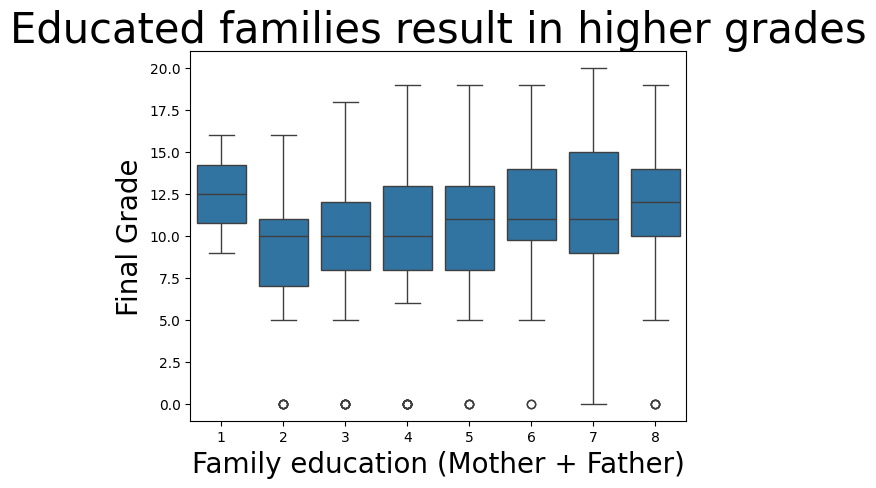

In [ ]:
family_ed = student_corr_table['Fedu'] + student_corr_table['Medu']
b = sns.boxplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Interessante. Sembra che studenti con genitori che hanno avuto meno istruzione tendono ad ottenere migliori risultati. Forse motivati dal voler rendere fieri i genitori o fare qualcosa che loro non hanno avuto modo di fare?
Controlliamo.

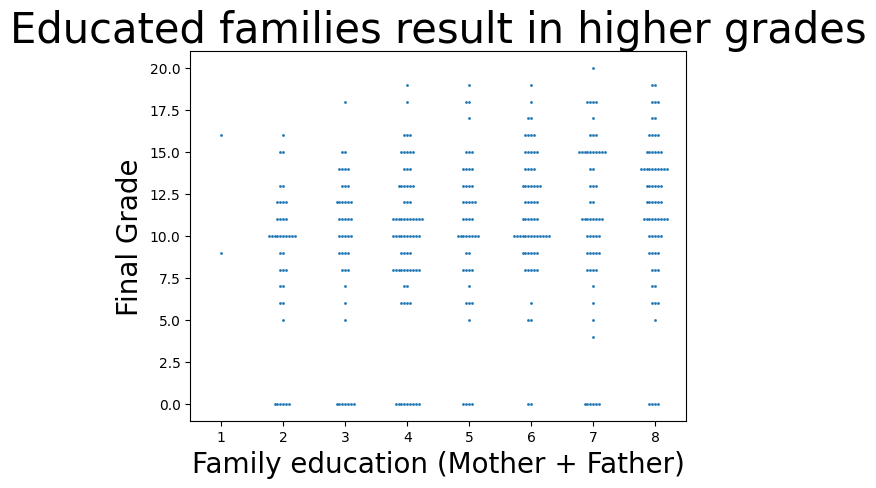

In [ ]:
b = sns.swarmplot(x=family_ed,y=student_corr_table['G3'], size=2)
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()


E invece no. Semplicemente ci sono pochissimi studenti con queste caratteristiche e pesano quindi molto sulla statistica.

Higher education was a categorical variable with values yes and no. Since we used one hot encoding it has been converted to 2 variables. So we can safely eliminate one of them (since the values are compliments of each other). We will eliminate higher_no, since higher_yes is more intuitive.

In [ ]:
student_corr_table = student_corr_table.drop('higher_no')
student_corr_table.head()

G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
i64,i64,i64,bool,i64,i64,i64,bool
6,0,4,true,18,4,4,true
6,0,1,true,17,1,3,true
10,3,1,true,15,1,2,true
15,0,4,true,15,2,2,false
10,0,3,true,16,3,2,true


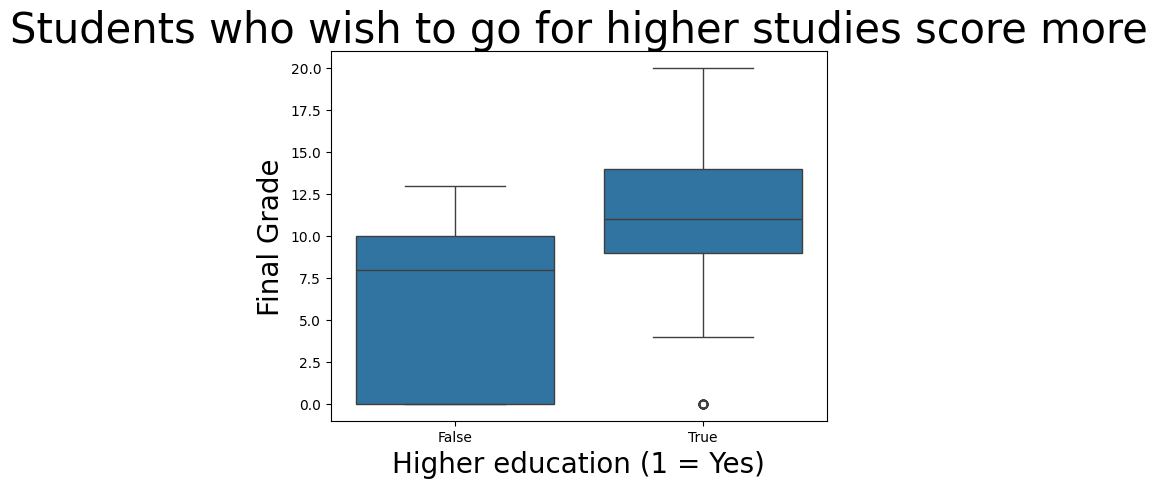

In [ ]:
b = sns.boxplot(x = student_corr_table['higher_yes'], y=student_corr_table['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()



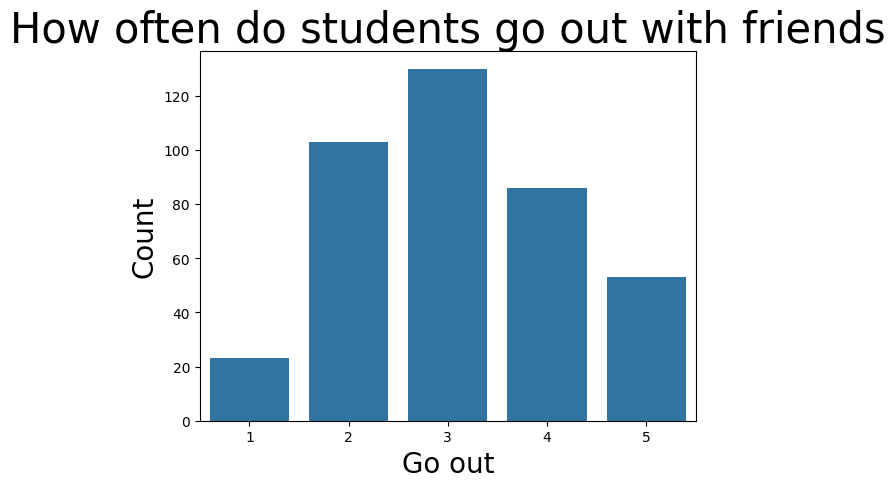

In [ ]:
b = sns.countplot(x=student_corr_table['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


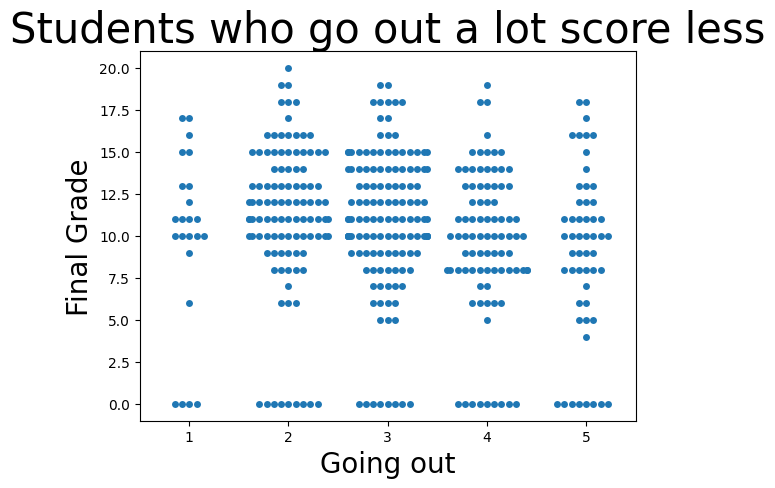

In [ ]:
b = sns.swarmplot(x=student_corr_table['goout'],y=student_corr_table['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 30)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()


Again because of one hot encoding we have our variable called romantic_no which is slightly less intuitive but I am going to stick with it. Keep in mind that:

    romantic_no = 1 means NO romantic relationship
    romantic_no = 0 means romantic relationship

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


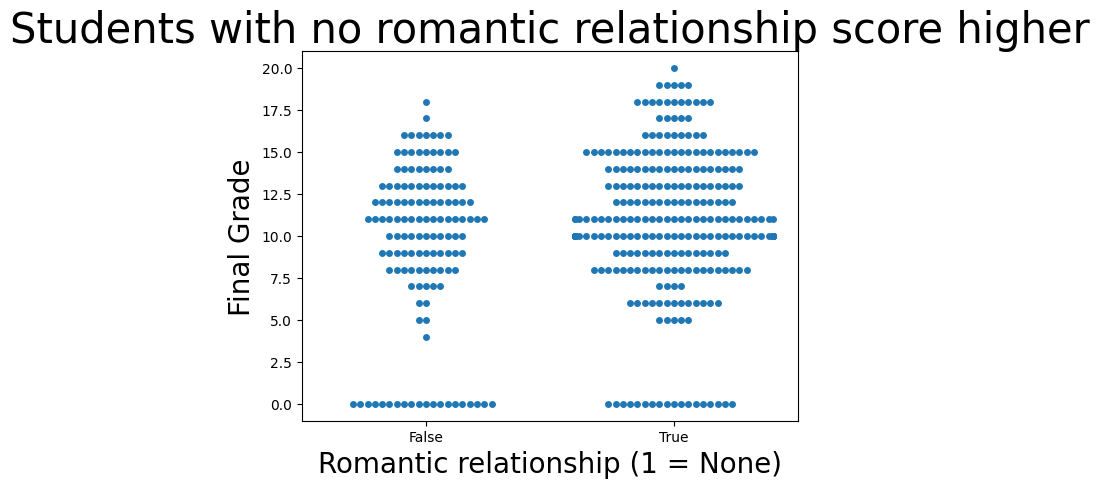

In [ ]:
b = sns.swarmplot(x=student_corr_table['romantic_no'],y=student_corr_table['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 30)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

We can create a model in 3 ways

    Binary classification
        G3 > 10: pass
        G3 < 10: fail
    5-level classification based on Erasmus grade conversion system
        16-20: very good
        14-15: good
        12-13: satisfactory
        10-11: sufficient
        0-9 : fail
    Regression (Predicting G3)

We will be using the 3rd type

In [ ]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(student_corr_table, labels, test_size = 0.25, random_state=42)



In [ ]:
X_train.head()

G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
i64,i64,i64,bool,i64,i64,i64,bool
14,0,4,true,16,4,3,true
12,0,4,true,15,4,3,false
13,0,4,true,17,4,5,false
6,0,4,true,17,4,4,true
10,0,4,true,16,3,3,true



MAE - Mean Absolute Error

RMSE - Root Mean Square Error


In [ ]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
  x = predictions - true
  mae = np.mean(abs(x).to_numpy())
  rmse = np.sqrt(np.mean(((x) ** 2).to_numpy()))

  return mae, rmse

In [ ]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = pd.Series([median_pred for _ in range(len(X_test))])


# store the true G3 values for passing into the function
true_g3_values = X_test['G3']

In [ ]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true_g3_values)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
import pandas
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)

    # Dataframe for results
    results = pandas.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results



In [ ]:
results = evaluate(X_train.to_pandas(), X_test.to_pandas(), y_train.to_pandas(), y_test.to_pandas())
results

,mae,rmse
Linear Regression,3.51289,4.451043
ElasticNet Regression,3.610609,4.576473
Random Forest,3.727003,4.781586
Extra Trees,3.885722,5.085621
SVM,3.588851,4.604374
Gradient Boosted,3.604738,4.486633
Baseline,3.787879,4.825228


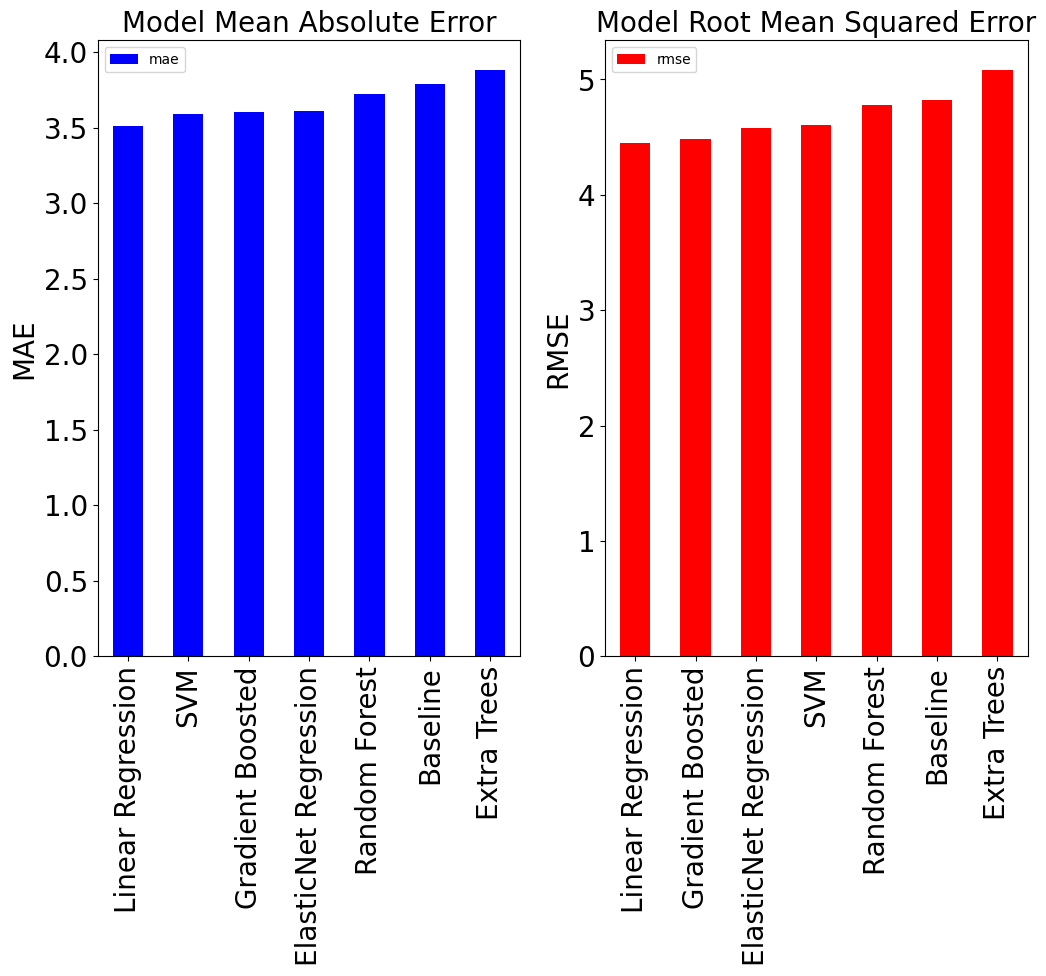

In [ ]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20)
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20)
plt.ylabel('RMSE',fontsize=20)

plt.show()

We see that linear regression is performing the best in both cases